In [52]:
%matplotlib inline

import matplotlib.pyplot as plt
import datetime

### Fetching packet data from server DB

In [53]:
import db_api
DB_FILE = "statistics_server.db"

conn = db_api.create_connection(DB_FILE)
packet_data = db_api.db_fetch_packet_data(conn)
prob_data = db_api.db_fetch_packet_data(conn,'prob_packet')

print packet_data[3]

(4, u'c4:b3:01:c3:da:bd', u'e4:ce:8f:64:be:37', 52, 24, -56, u'Apple', 1513351094.444635)


In [54]:
pl = []
rate =[]
rssi = []
timestamps = []
#vendor

for pkt in packet_data:
    pl.append(pkt[3])
    rate.append(pkt[4])
    rssi.append(pkt[5])
    timestamps.append(pkt[7])

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

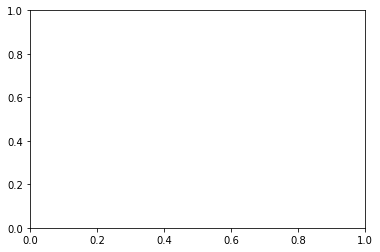

In [55]:
plt.bar(pl,rate)
plt.xlabel('Payload length',fontsize=20)
plt.ylabel('Rate',fontsize=16)

plt.show()

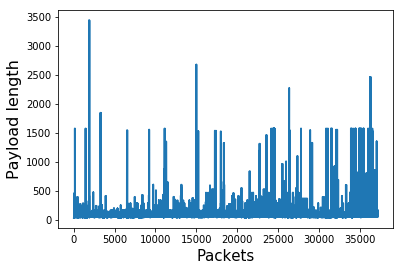

In [51]:
plt.plot(pl)
plt.xlabel("Packets",fontsize=15)
plt.ylabel('Payload length',fontsize=16)
plt.show()

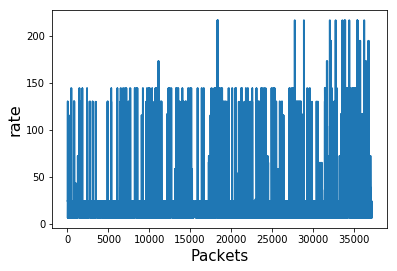

In [7]:
plt.plot(rate)
plt.xlabel("Packets",fontsize=15)
plt.ylabel('rate',fontsize=16)
plt.show()

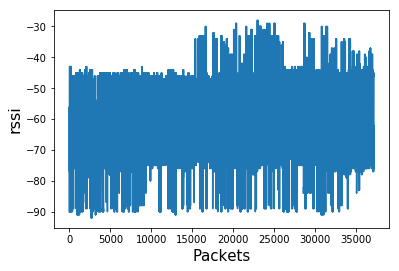

In [8]:
plt.plot(rssi)
plt.xlabel("Packets",fontsize=15)
plt.ylabel('rssi',fontsize=16)
plt.show()

In [9]:
print(
    datetime.datetime.fromtimestamp(
        int("1284101485")
    ).strftime('%Y-%m-%d %H:%M:%S')
    )


2010-09-10 09:51:25


2017-12-15 17:18:17.530430


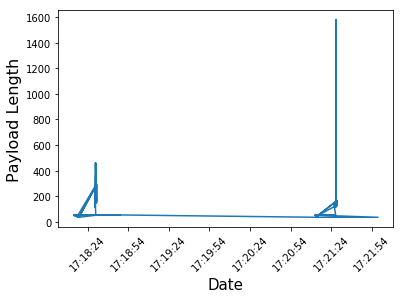

In [49]:
import time
import datetime as dt
import numpy as np

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
dateconv = np.vectorize(dt.datetime.fromtimestamp)
date = dateconv(timestamps[:200])
print date[0]

ax1.plot(date,pl[:200])
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
plt.xlabel("Date",fontsize=15)
plt.ylabel('Payload Length',fontsize=16)
plt.show()


### Handle sessions using db_api.py

In [36]:
import db_api
db_file = 'statistics.db'

conn = db_api.create_connection(db_file)
with conn:
    query = "SELECT * FROM data_p_stats;"
    c = conn.cursor()
    c.execute(query)
    sessions = c.fetchall()

throughput = []
timestamp = []
for session in sessions:
    throughput.append(session[9])
    timestamp.append(session[7])

2017-12-18 12:37:13.339010


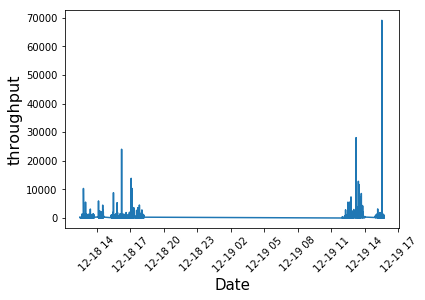

In [42]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
dateconv = np.vectorize(dt.datetime.fromtimestamp)
date = dateconv(timestamp)
print date[0]

ax1.plot(date,throughput)
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
plt.xlabel("Date",fontsize=15)
plt.ylabel('throughput',fontsize=16)
plt.show()